In [5]:
#visualizing protostellar disks data from protostellar disk catalog

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

#from sort_functions import sort_spectral_class 
#from sort_functions import b, c
#from sort_functions import a
import importlib
from functions import sort_functions_visibility
importlib.reload(sort_functions_visibility)

from functions import sort_functions_astrometry
importlib.reload(sort_functions_astrometry)

from astropy import units as u
from astropy.coordinates import SkyCoord
from mw_plot import MWPlot

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

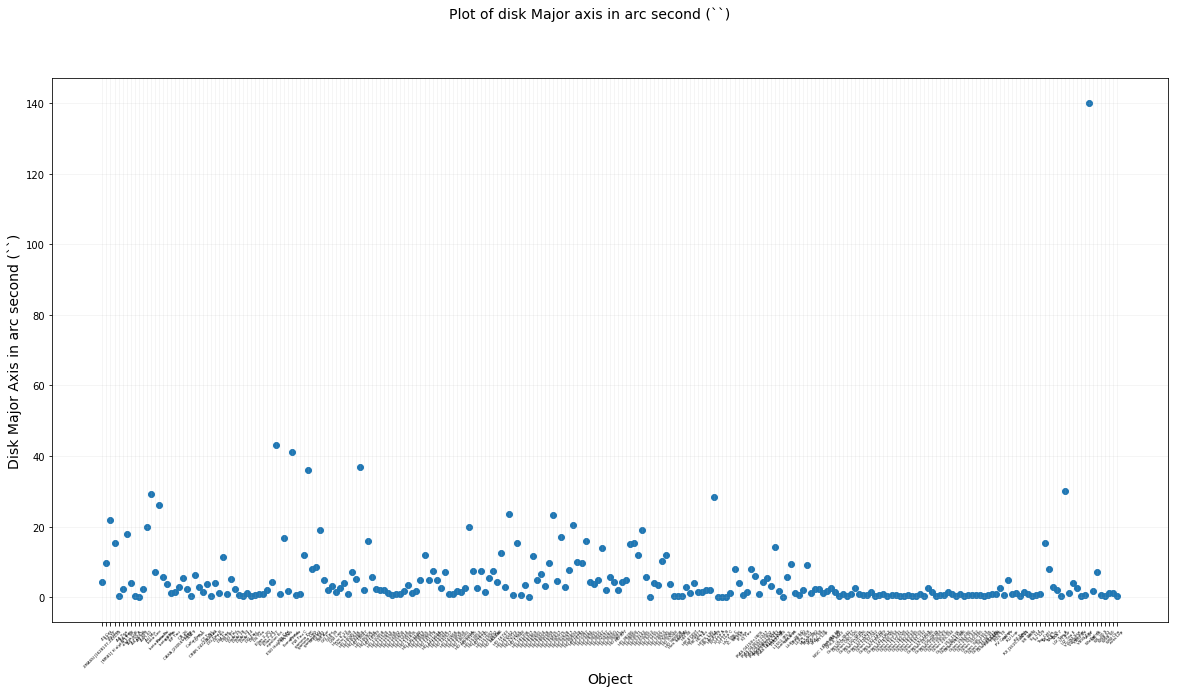

Disc with largest Major Axis Angular Size: Vega Size: 140 arcsec
Disc with smallest Major Axis Angular Size: HT Lup B Size: 0.032 arcsec

Mean major axis: 5.56395652173913
Median major axis: 2.14


In [6]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data["Object"], data["Disk_Major_Axis"])

fig.suptitle('Plot of disk Major axis in arc second (``) ', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Major Axis in arc second (``)', fontsize=14)

plt.yticks(np.arange(0, 150, step=20))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig('Disk_major_axis.png')
plt.show()

#So the largest apparent disk:
print("Disc with largest Major Axis Angular Size:" + " " + str(data.loc[data['Disk_Major_Axis'].idxmax()][0]) + " Size: " + str(str(data.loc[data['Disk_Major_Axis'].idxmax()][5])*u.arcsec))
#Smallest apparent disk:
print("Disc with smallest Major Axis Angular Size:" + " " + str(data.loc[data['Disk_Major_Axis'].idxmin()][0]) + " Size: " + str(str(data.loc[data['Disk_Major_Axis'].idxmin()][5])*u.arcsec))
#Smallest apparent disk:
print("\nMean major axis: " + str(np.mean(np.array(data['Disk_Major_Axis'])) ))
print("Median major axis: " + str(np.median(np.array(data['Disk_Major_Axis'])) ))


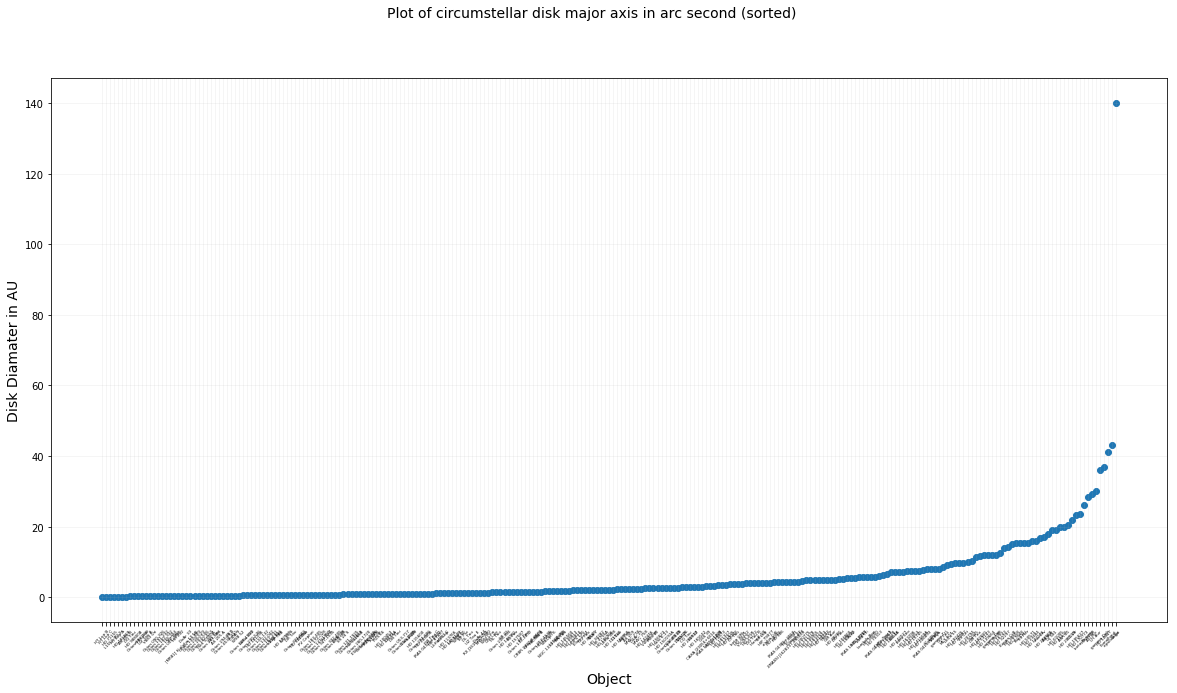

In [7]:
#Sorted Angular Size
sorted_objects = data.sort_values(by ='Disk_Major_Axis')
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_objects["Object"], sorted_objects["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar disk major axis in arc second (sorted)', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 150, step=20))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig('Disk_major_axis_sorted.png')
plt.show()

In [8]:
#cat_magnitude_diameter = sort_functions_astrometry.cat_mag_diam(data)
cat_magnitude_diameter = sort_functions_visibility.cat_mag_diam(data, 'Disk_Major_Axis')

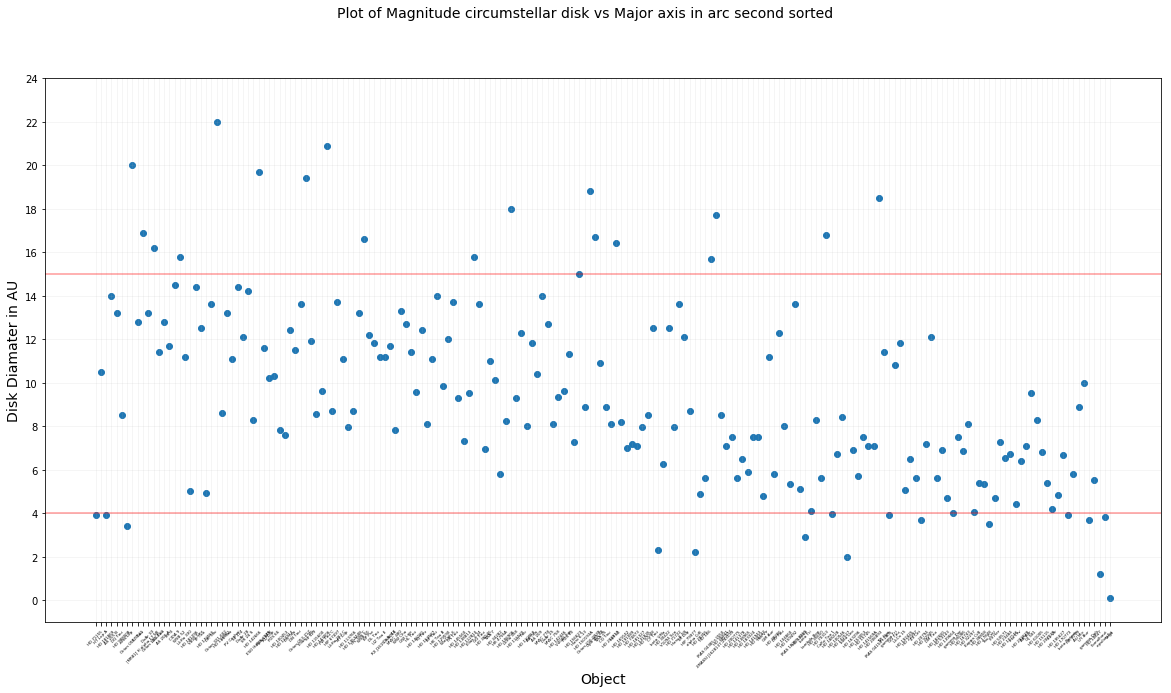

Length Array: 194


In [9]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(cat_magnitude_diameter["Object"], cat_magnitude_diameter['R_band_mag'])

fig.suptitle('Plot of disk Magnitude vs Major axis in arc second sorted', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
#bracket
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 25, step=2))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig("Magnitude_major_axis.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array( cat_magnitude_diameter["R_band_mag"]))))

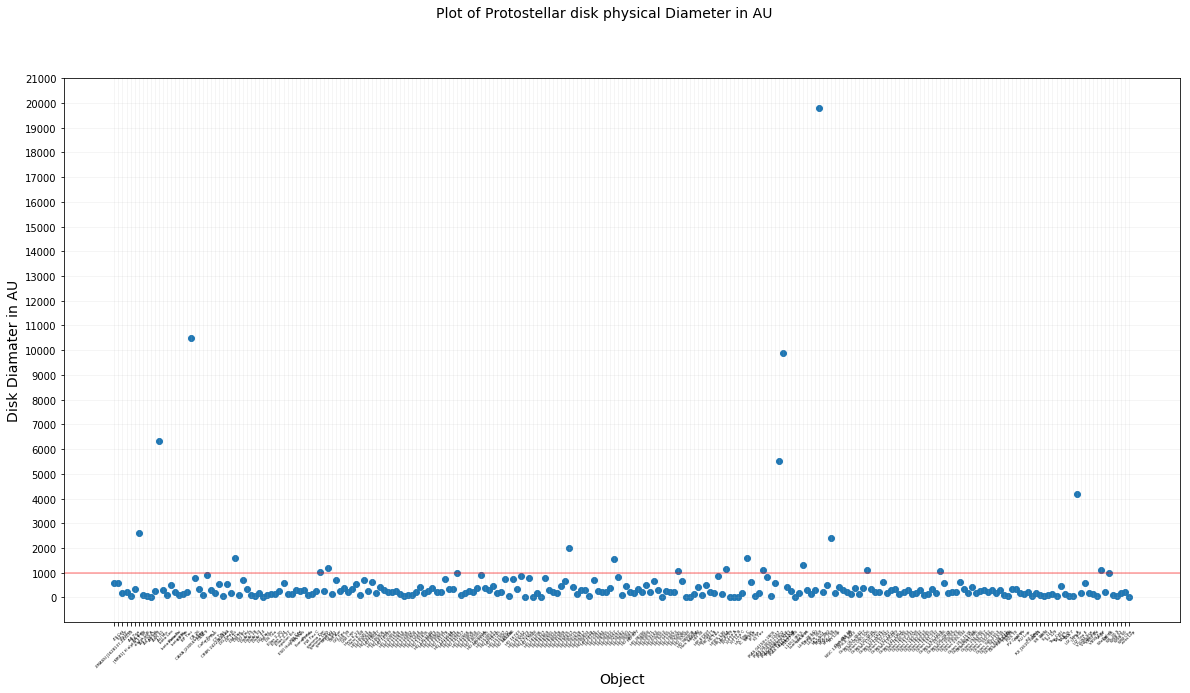

Disc with largest physical Diameter: M17-SO1 19800 AU
Disc with smallest physical Diameter: HD 71155 3.8 AU

Mean disk physical Diameter: 567.3088537549407
Median median physical Diameter: 236.0

Most Disks are < 1000 AU across


In [32]:
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(data["Object"], data["Disk_Diameter_AU"])

fig.suptitle('Plot of Protostellar disk physical Diameter in AU', fontsize=14)

#plt.axhline(y=320, alpha= 0.4, color='r')
plt.axhline(y=1000, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

#So the largest apparent disk:
print("Disc with largest physical Diameter:" + " " + str(data.loc[data['Disk_Diameter_AU'].idxmax()][0]) + " " + str(str(data.loc[data['Disk_Diameter_AU'].idxmax()][6])*u.AU))
#Smallest apparent disk:
print("Disc with smallest physical Diameter:" + " " + str(data.loc[data['Disk_Diameter_AU'].idxmin()][0]) + " " + str(str(data.loc[data['Disk_Diameter_AU'].idxmin()][6])*u.AU))

print("\nMean disk physical Diameter: " + str(np.mean(np.array(data['Disk_Diameter_AU'])) ))
print("Median median physical Diameter: " + str(np.median(np.array(data['Disk_Diameter_AU'])) ))

print("\nMost Disks are < 1000 AU across")

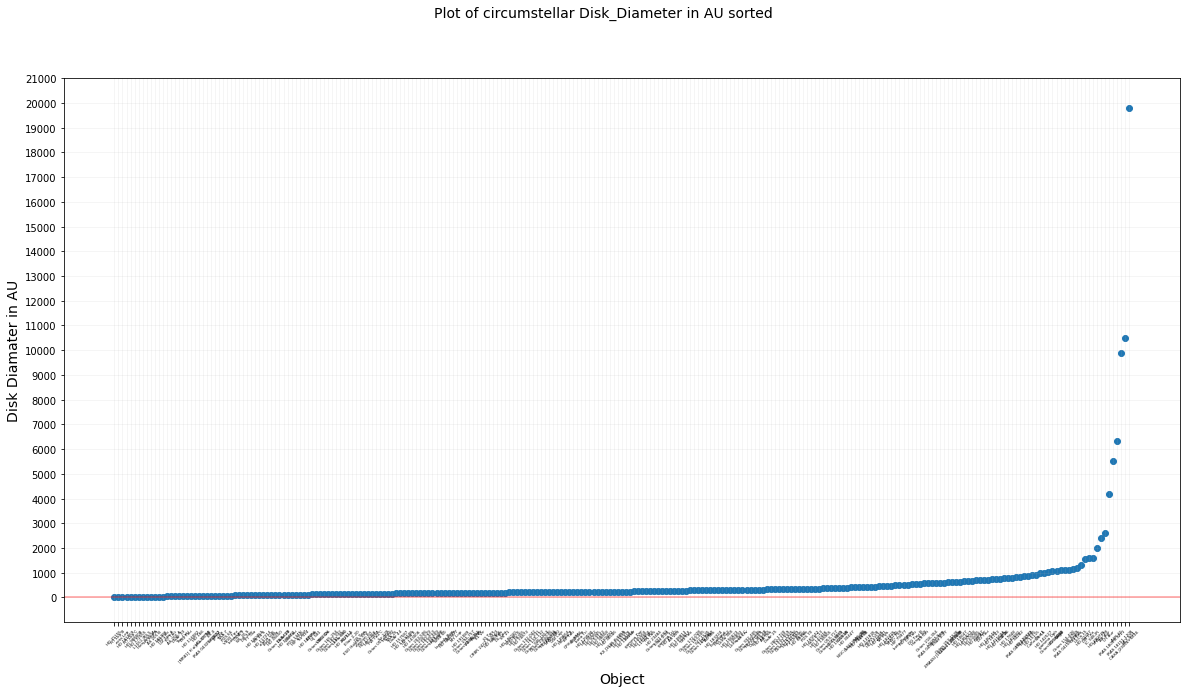

In [11]:
#magnitudes_sorted = sorted_objects.dropna()
sorted_objects = data.sort_values(by ='Disk_Diameter_AU')
fig = plt.figure(figsize=(20,10))
plt.scatter(sorted_objects["Object"], sorted_objects["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU sorted', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

In [12]:
cat_magnitude_diameter = sort_functions_visibility.cat_mag_diam(data, 'Disk_Diameter_AU')

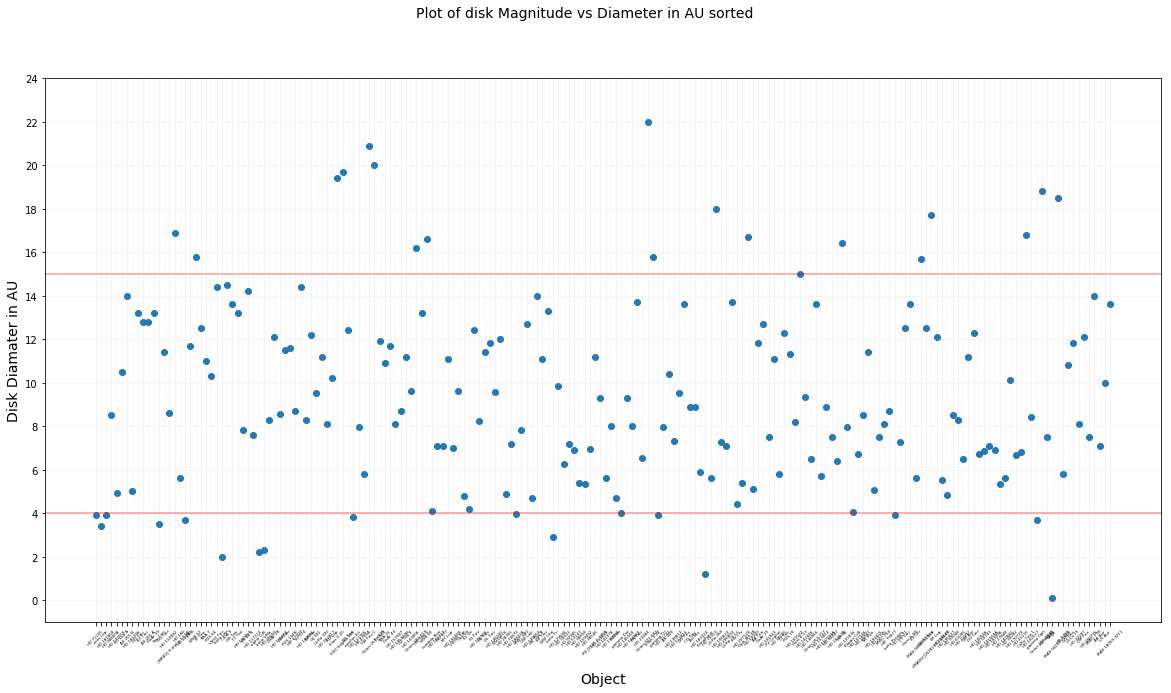

Length Array: 194
Less negative correlation between magnitude and Disk Diameter in AU


In [33]:
#is there a correlation between distance and magnitude Region of Interest?
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(cat_magnitude_diameter["Object"], cat_magnitude_diameter['R_band_mag'])

fig.suptitle('Plot of disk Magnitude vs Diameter in AU sorted', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
#bracket
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

plt.yticks(np.arange(0, 25, step=2))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.savefig("Magnitude_sorted_diameter_AU.png")

plt.show()

#print("Highest Magnitude: " + str( np.array( cat_magnitude_diameter["R_band_mag"])))
print("Length Array: " + str( len(np.array( cat_magnitude_diameter["R_band_mag"]))))

print("Less negative correlation between magnitude and Disk Diameter in AU")

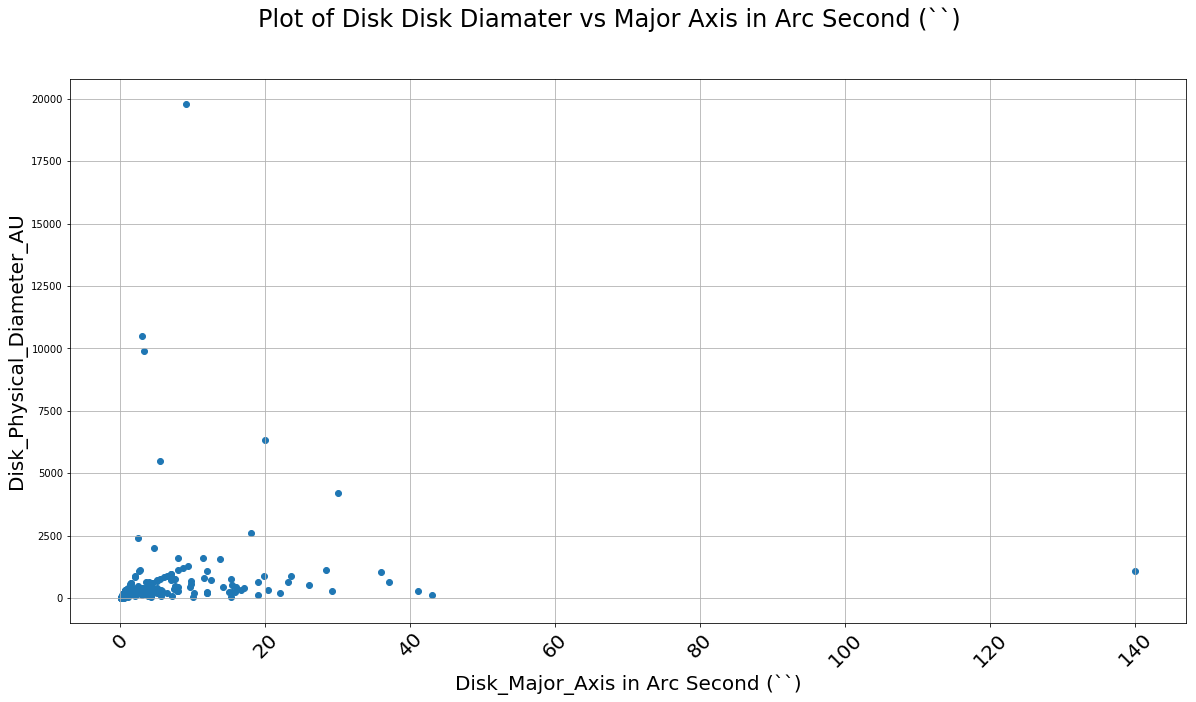

In [46]:
#which category had largest disk? Angular Size
#disk_types = ["Debris", "TT", "UC", "YSO", "HAe", "Trans","YSO?", "PPN","HBe", "wTT"]
#a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter( sorted_objects['Disk_Major_Axis'], sorted_objects['Disk_Diameter_AU']) #Some lack a Category...
plt.xticks(rotation=45, fontsize=20)
fig.suptitle('Plot of Disk Disk Diamater vs Major Axis in Arc Second (``)', 
             fontsize=24)
#plt.axhline(y=4, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')

plt.xlabel('Disk_Major_Axis in Arc Second (``)', fontsize=20)
plt.ylabel('Disk_Physical_Diameter_AU', fontsize=20)

#plt.yticks(np.arange(0, 45, step=4))
#plt.xticks(np.arange(0, 5000, step=1000))

plt.grid()
#plt.savefig('pngs/magnitude_category.png')
plt.show()


In [15]:
#which category had largest disk? Physical Disk

In [59]:
category_size_arrange = pd.DataFrame(columns=['Object', 
                                                    'Categrory',
                                                    'Disk_Major_Axis',
                                                    'Disk_Diameter_AU']) #empty pandas array

In [60]:
for types in disk_types:
    for index, row in sorted_objects.iterrows(): 
           if(str(row[1]) == types):
            #print(str(row[0]) + " " + str(row[1]) + " " + types)    
            category_size_arrange = category_size_arrange.append({
                'Object': row[0], 
                'Categrory': row[1],
                'Disk_Major_Axis' : float(row[5]),
                'Disk_Diameter_AU' : float(row[6])
            },ignore_index=True)

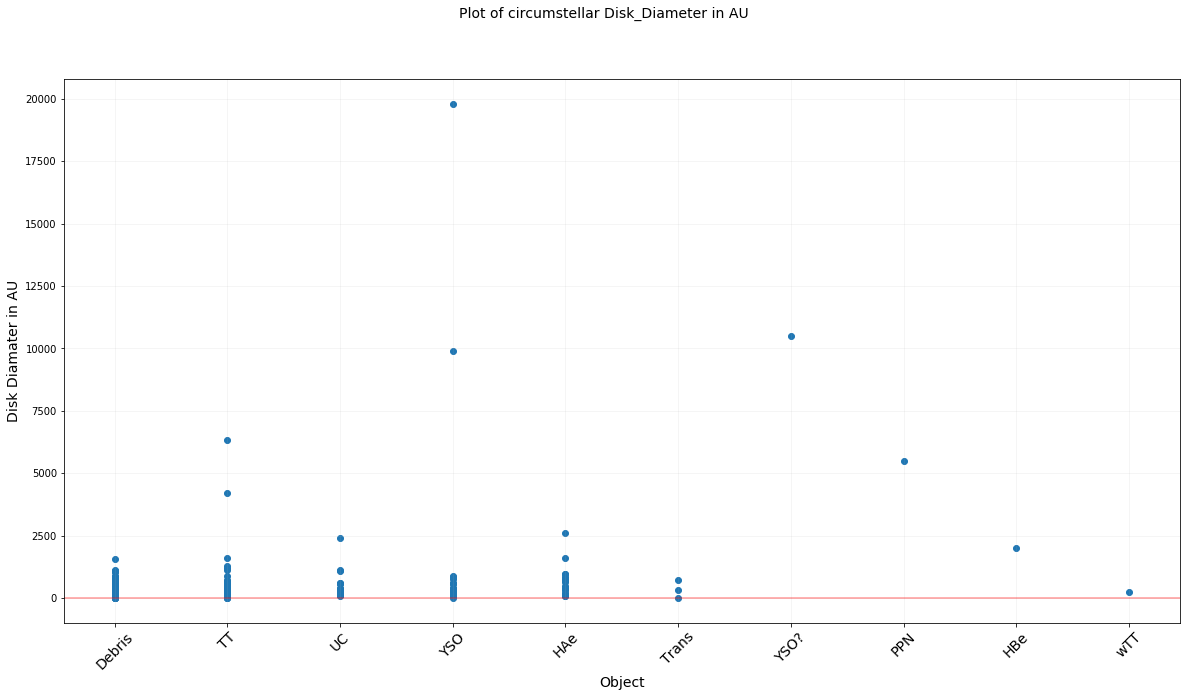

In [62]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Categrory"], category_size_arrange["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=14)

plt.grid(alpha = 0.15)
plt.show()

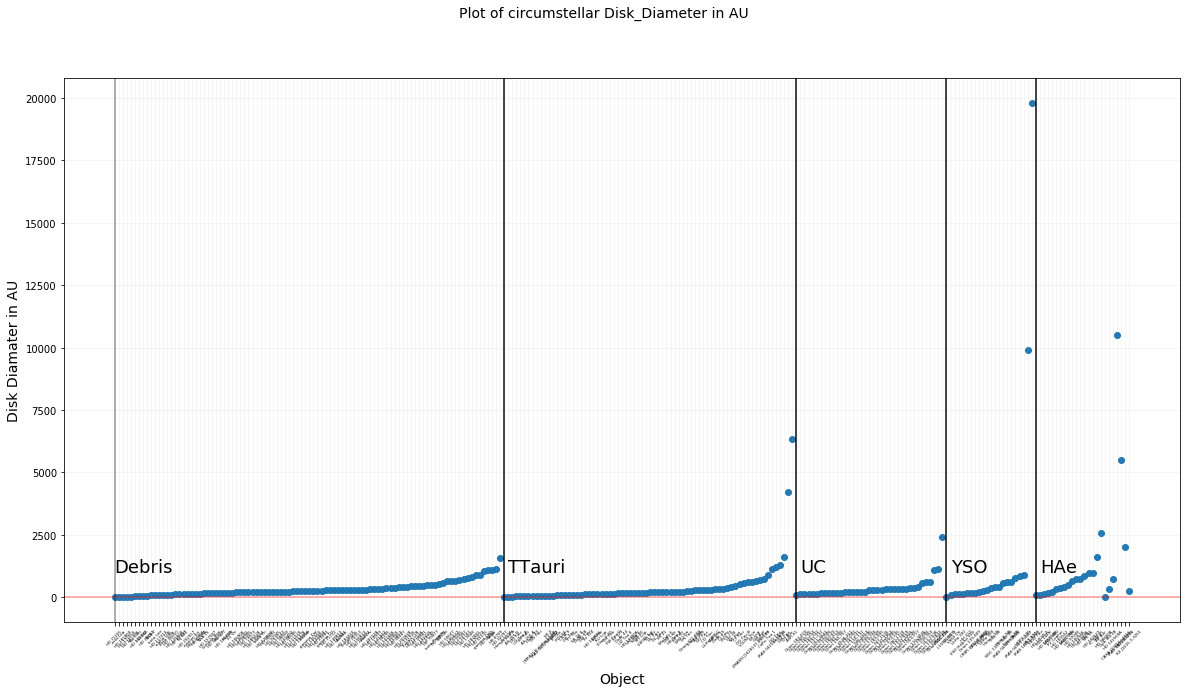

In [66]:
#magnitudes_sorted = sorted_objects.dropna()
disk_categories = ['Debris', 'TTauri', 'UC', 'YSO' ,'HAe' ,'Trans','PPN?']
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Object"], category_size_arrange["Disk_Diameter_AU"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')
c=1
for i in range(1, 242):#goes thrrough all the data
    if(i == 1):
        plt.axvline(x=i-1, alpha= 0.4, color='black') #light blue
        plt.text(i-1, 1000, disk_categories[0],
                 color='black', 
                 fontsize = 18)
    elif(category_size_arrange["Categrory"][i][0] != category_size_arrange["Categrory"][i-1][0]):
        plt.axvline(x=i, alpha= 10, color='black')#print on the letter now
        plt.text(i+1, 1000, disk_categories[c], color='black', fontsize = 18)
        c += 1
    #             magnitude_spec_type_arrange['Spec_Type'][i][0], color='black', fontsize = 18)
    #    

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()

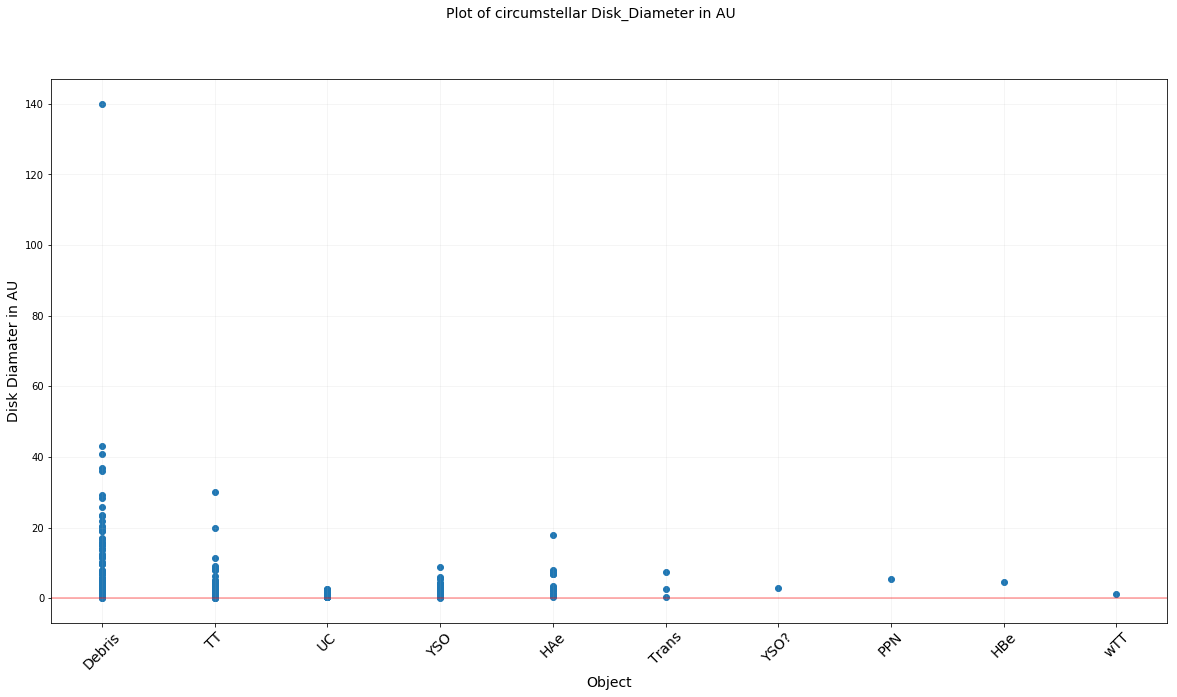

In [67]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Categrory"], category_size_arrange["Disk_Major_Axis"])

fig.suptitle('Plot of circumstellar Disk_Diameter in AU', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in AU', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=14)

plt.grid(alpha = 0.15)
plt.show()

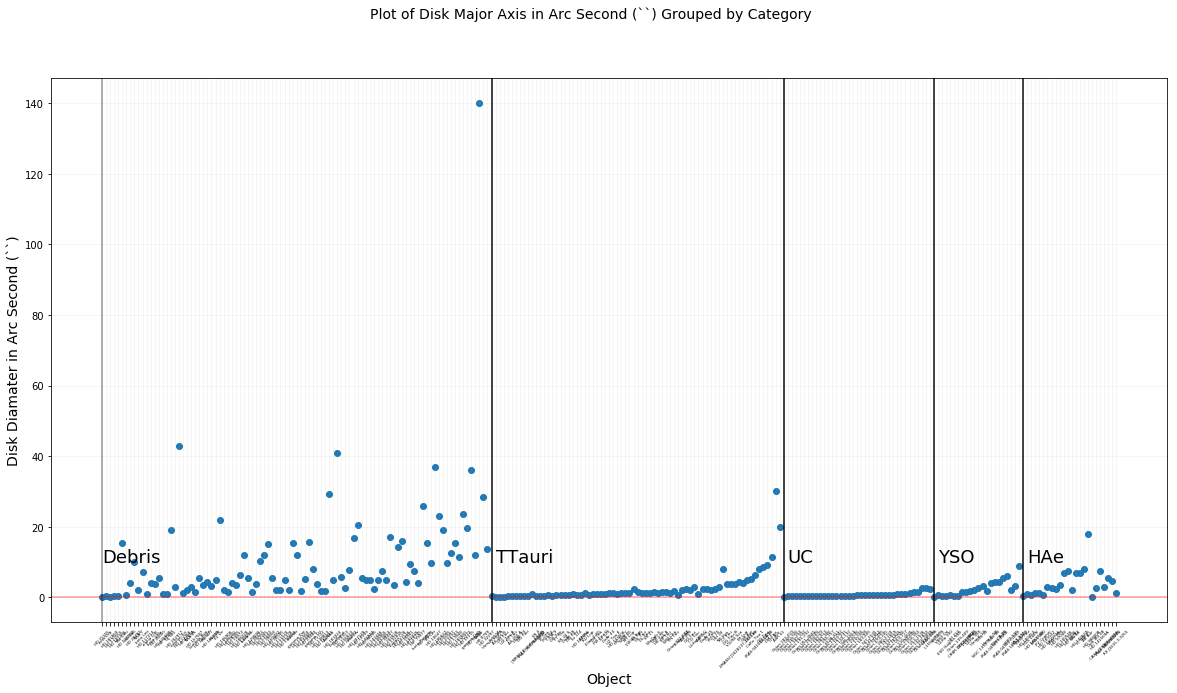

In [73]:
#magnitudes_sorted = sorted_objects.dropna()
fig = plt.figure(figsize=(20,10))
plt.scatter(category_size_arrange["Object"], category_size_arrange["Disk_Major_Axis"])

fig.suptitle('Plot of Disk Major Axis in Arc Second (``) Grouped by Category', fontsize=14)

#plt.axvline(x=252, alpha= 0.4, color='r')
#plt.axhline(y=15, alpha= 0.4, color='r')
plt.axhline(y=0, alpha= 0.4, color='r')

c=1
for i in range(1, 242):#goes thrrough all the data
    if(i == 1):
        plt.axvline(x=i-1, alpha= 0.4, color='black') #light blue
        plt.text(i-1, 10, disk_categories[0],
                 color='black', 
                 fontsize = 18)
    elif(category_size_arrange["Categrory"][i][0] != category_size_arrange["Categrory"][i-1][0]):
        plt.axvline(x=i, alpha= 10, color='black')#print on the letter now
        plt.text(i+1, 10, disk_categories[c], color='black', fontsize = 18)
        c += 1

plt.xlabel('Object', fontsize=14)
plt.ylabel('Disk Diamater in Arc Second (``)', fontsize=14)

#plt.yticks(np.arange(0, 22000, step=1000))
plt.xticks(rotation=45, fontsize=4)

plt.grid(alpha = 0.15)
plt.show()